In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import t
import site
from importlib import reload
reload(site)
import sys #Changing the system path

sys.path.insert(0, '/home/hongxiang/Documents/repos/Nonlinear-Statistical-Coupling')

#Importing different versions of CoupledNormal
from nsc.distributions.coupled_normal import CoupledNormal
from nsc.distributions.coupled_normal_tf import CoupledNormal as CoupledNormal_tf

In [15]:
##Testing
# Define the loc, scale, alpha, and kappas that will be used for all distributions.
loc, scale = 0., 1.
alpha = 2
n_sample = 10000

# Checking the pdf

In [16]:
kappa=0.3
cn_tf = CoupledNormal_tf(loc=loc, scale=scale, kappa=kappa, tensorflow=True)
cn = CoupledNormal(loc=loc, scale=scale, kappa=kappa)

X = tf.random.normal([100])

#Checking original implementation vs with tensor input
(cn.prob(X.numpy()) == cn_tf.prob(X).numpy()).all()

True

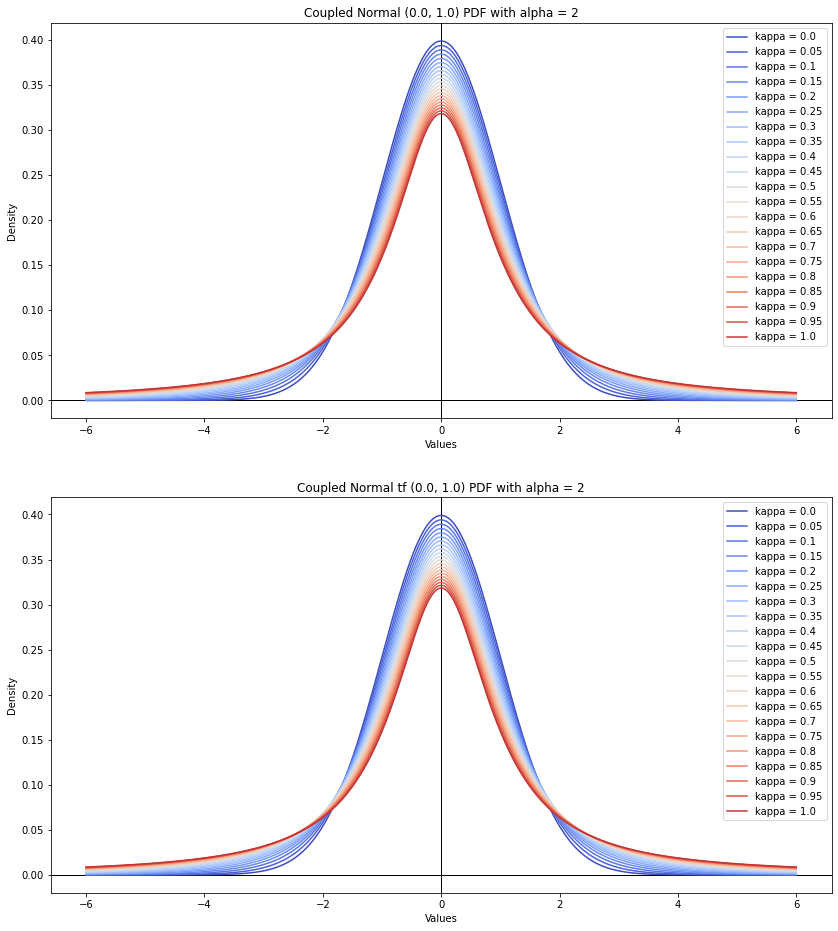

In [17]:
# Define the values the various Coupled Gaussians can range from -6*scale to 6*scale
X = np.linspace(-6*scale, 6*scale, n_sample)

# Plot Coupled Gaussians (loc, scale) with alpha = 2, with kappas going from 0 to 1
# by steps of 0.1
fig, axs= plt.subplots(2,1, figsize=(14, 16))

for ax in axs:
    ax.axvline(c='black', lw=1)
    ax.axhline(c='black', lw=1)

# plt.figure(figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')

cm = plt.get_cmap('coolwarm')
kappa_values = np.linspace(0, 1, 21)
n = len(kappa_values)

for ax in axs:
    ax.set_prop_cycle(color=[cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

#Storing pdf values
cn_pdf_vals_true = []
cn_pdf_vals_tf = []
for kappa in kappa_values:
    #Original
    temp_normal = CoupledNormal(loc=loc,
                                    scale=scale,
                                    kappa=round(kappa, 2),
                                    alpha=alpha
                                    )
    axs[0].plot(X, temp_normal.prob(X), label=f'kappa = {temp_normal.kappa}')
    
for kappa in kappa_values:
    #Tensorflow
    temp_normal_tf = CoupledNormal_tf(loc=loc,
                                    scale=scale,
                                    kappa=round(kappa, 2),
                                    alpha=alpha
                                    )
    axs[1].plot(X, temp_normal_tf.prob(X), label=f'kappa = {temp_normal_tf.kappa}')
    
    
    cn_pdf_vals_true.append(temp_normal.prob(X))
    cn_pdf_vals_tf.append(temp_normal_tf.prob(X))
    
axs[0].set_title(f'Coupled Normal ({loc}, {scale}) PDF with alpha = {alpha}')
axs[1].set_title(f'Coupled Normal tf ({loc}, {scale}) PDF with alpha = {alpha}')

for ax in axs:
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')
    ax.legend()

In [18]:
cn_pdf_vals_true = np.array(cn_pdf_vals_true)
cn_pdf_vals_tf = np.array(cn_pdf_vals_tf)

print((cn_pdf_vals_true == cn_pdf_vals_true).all())

True


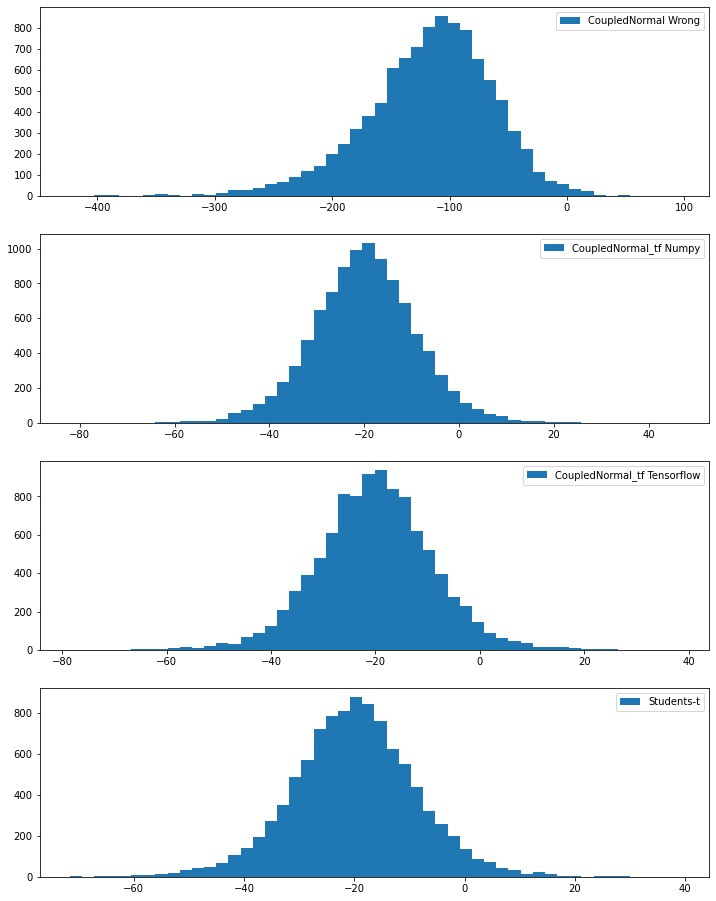

In [20]:
# Checking the sampling
kappa = 0.1
loc = -20.0
scale=10.0
sample_size = 10000
bins = 50

#CoupledNormal
cn = CoupledNormal(loc=loc, scale=scale, kappa=kappa)
cn_samples = cn.sample_n(sample_size)

#CoupledNormal_tf
cn_tf = CoupledNormal_tf(loc=loc, scale=scale, kappa=kappa)
cn_tf_samples = cn_tf.sample_n(sample_size)

#CoupledNormal_tf using tensors
cn_tf = CoupledNormal_tf(loc=loc, scale=scale, kappa=kappa, tensorflow=True)
cn_tf_tensor_samples = cn_tf.sample_n(sample_size)

#Scipy students_t
s_t_samples = t.rvs(df=1/kappa, loc=loc, scale=scale, size=sample_size)

fig, axs = plt.subplots(4, 1, figsize=(12, 16))
#plt.setp(axs, xlim=(-10*scale + loc, 10*scale + loc))
axs[0].hist(cn_samples, bins=bins, label='CoupledNormal Wrong')
axs[1].hist(cn_tf_samples, bins=bins, label='CoupledNormal_tf Numpy')
axs[2].hist(cn_tf_tensor_samples.numpy(), bins=bins, label='CoupledNormal_tf Tensorflow')
axs[3].hist(s_t_samples, bins=bins, label='Students-t')

for ax in axs:
    ax.legend()

In [21]:
np.mean(s_t_samples)

-19.968417651860033

In [23]:
np.mean(cn_tf_tensor_samples)

-20.100891